In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:
# Upload the data
from google.colab import files
uploaded = files.upload()

Saving labeled_2016_2024_test_data.csv to labeled_2016_2024_test_data.csv
Saving 2016_2024_NYT_articles.csv to 2016_2024_NYT_articles.csv
Saving preprocessed_sentiment.csv to preprocessed_sentiment.csv


In [ ]:
df = pd.read_csv("preprocessed_sentiment.csv")
df_test = pd.read_csv("labeled_2016_2024_test_data.csv")


In [ ]:
df.rename(columns={'is_positive':"label"}, inplace=True)
df.head()

,Unnamed: 0,text,label
0,0,Two places I'd invest all my money if I could:...,1
1,1,Awesome! Google driverless cars will help the ...,1
2,2,If Google maps can't keep up with road constru...,0
3,3,Autonomous cars seem way overhyped given the t...,0
4,8,Autonomous vehicles could reduce traffic fatal...,1


Maximum length: 272
Minimum length: 77


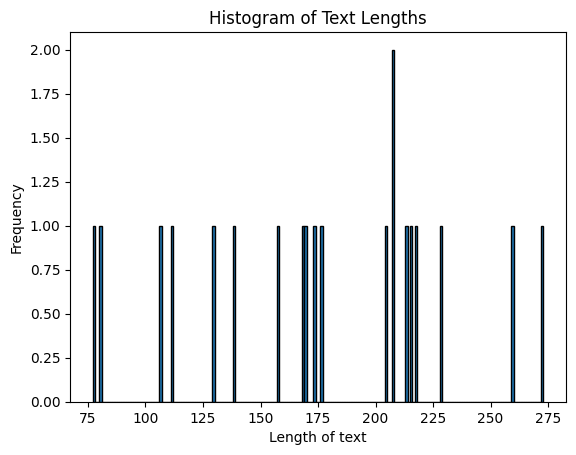

In [ ]:
import matplotlib.pyplot as plt

lengths = df_test['text'].str.len()

# Find the maximum and minimum lengths
max_length = lengths.max()
min_length = lengths.min()

print(f"Maximum length: {max_length}")
print(f"Minimum length: {min_length}")
plt.hist(lengths, bins=range(lengths.min(), lengths.max() + 2), edgecolor='black')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths')
plt.show()

In [ ]:
def tokenize(df, maxwords, max_length):
  comments = df['text'].values

  # Tokenization
  max_words = maxwords
  tokenizer = Tokenizer(num_words=max_words)

  tokenizer.fit_on_texts(tqdm(comments, desc="Tokenizing"))
  sequences = tokenizer.texts_to_sequences(tqdm(comments, desc="Converting to Sequences"))

  # Padding sequences
  maxlen = max_length
  data = pad_sequences(sequences, maxlen=maxlen)

  labels = df['label'].values

  return data, labels


In [ ]:
max_words = 10000
maxlen = 250

data, labels = tokenize(df, max_words, maxlen)
tonkenized_eval_data, eval_labels = tokenize(df_test, max_words, maxlen)

Converting to Sequences: 100%|██████████| 20/20 [00:00<00:00, 21323.36it/s]


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

#Good 76.11%
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
54/54 [==============================] - 79s 1s/step - loss: 0.6219 - accuracy: 0.7092 - val_loss: 0.6268 - val_accuracy: 0.6759
Epoch 2/10
54/54 [==============================] - 66s 1s/step - loss: 0.5813 - accuracy: 0.7178 - val_loss: 0.5869 - val_accuracy: 0.6759
Epoch 3/10
54/54 [==============================] - 66s 1s/step - loss: 0.4325 - accuracy: 0.8088 - val_loss: 0.6171 - val_accuracy: 0.7338
Epoch 4/10
54/54 [==============================] - 66s 1s/step - loss: 0.2555 - accuracy: 0.8992 - val_loss: 0.7459 - val_accuracy: 0.7384
Epoch 5/10
54/54 [==============================] - 65s 1s/step - loss: 0.1664 - accuracy: 0.9351 - val_loss: 0.9114 - val_accuracy: 0.7361
Epoch 6/10
54/54 [==============================] - 65s 1s/step - loss: 0.1236 - accuracy: 0.9461 - val_loss: 1.0361 - val_accuracy: 0.7431
Epoch 7/10
54/54 [==============================] - 65s 1s/step - loss: 0.0835 - accuracy: 0.9548 - val_loss: 1.1486 - val_accuracy: 0.7315
Epoch 8/10
54/54 [==

In [ ]:

model.save('sentiment_model.h5')

In [ ]:
from google.colab import files

# Download the model file
files.download('sentiment_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
article_loss, article_acc = model.evaluate(tonkenized_eval_data, eval_labels)
print('Test accuracy:', article_acc)

1/1 [==============================] - 0s 158ms/step - loss: 4.2869 - accuracy: 0.3500
Test accuracy: 0.3499999940395355
